# Exploratory Data Analysis

## Roles to Explore: 

In [2]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset

# Loading Data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

# Data Clean Up
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
country_name = 'United States'
# country_name = 'Belgium'
df_DA_Country = df[(df['job_country'] == country_name) & (df['job_title_short'] == 'Data Analyst')]

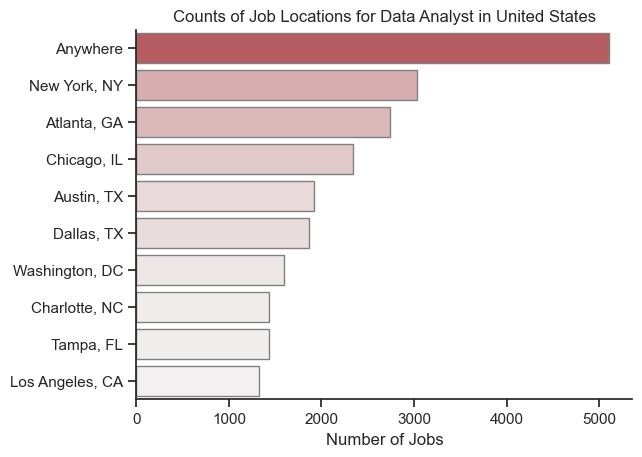

In [4]:
df_plot = df_DA_Country['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='light:r',edgecolor='grey', legend=False)
sns.despine()
plt.title(f'Counts of Job Locations for Data Analyst in {country_name}')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

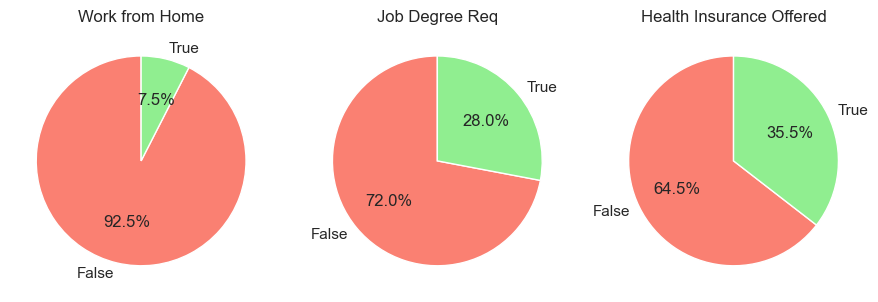

In [5]:
dict_column = {
    'job_work_from_home': 'Work from Home',
    'job_no_degree_mention': 'Job Degree Req',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3)
fig.set_size_inches((9,6))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_DA_Country[column].value_counts(), startangle=90, autopct='%1.1f%%', labels=['False','True'], colors=['salmon', 'lightgreen'])
    ax[i].set_title(title)

fig.tight_layout() 
plt.show()


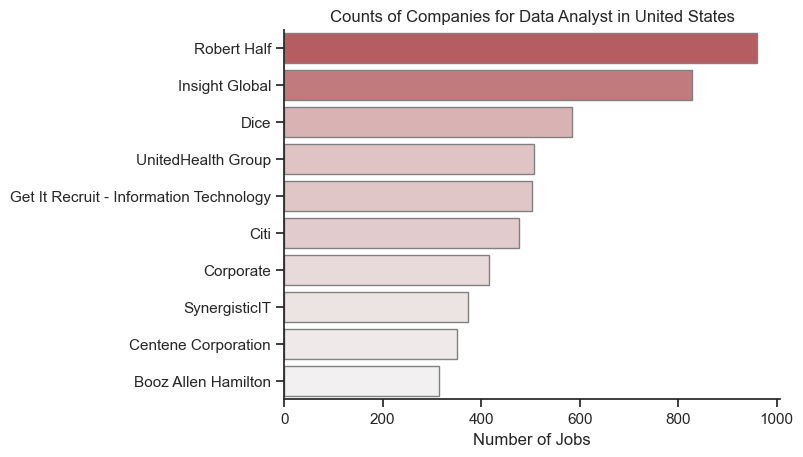

In [6]:
df_plot = df_DA_Country['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='light:r',edgecolor='grey', legend=False)
sns.despine()
plt.title(f'Counts of Companies for Data Analyst in {country_name}')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show() 